In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from statsmodels.nonparametric.smoothers_lowess import lowess
from datetime import datetime


In [3]:
df = pd.read_csv('Gro_handelspreise_201501010000_202412020000_Stunde.csv',sep=';')

In [5]:
df.tail()

,Datum von,Datum bis,Deutschland/Luxemburg [€/MWh] Originalauflösungen,∅ Anrainer DE/LU [€/MWh] Originalauflösungen,Belgien [€/MWh] Originalauflösungen,Dänemark 1 [€/MWh] Originalauflösungen,Dänemark 2 [€/MWh] Originalauflösungen,Frankreich [€/MWh] Originalauflösungen,Niederlande [€/MWh] Originalauflösungen,Norwegen 2 [€/MWh] Originalauflösungen,Österreich [€/MWh] Originalauflösungen,Polen [€/MWh] Originalauflösungen,Schweden 4 [€/MWh] Originalauflösungen,Schweiz [€/MWh] Originalauflösungen,Tschechien [€/MWh] Originalauflösungen,DE/AT/LU [€/MWh] Originalauflösungen,Italien (Nord) [€/MWh] Originalauflösungen,Slowenien [€/MWh] Originalauflösungen,Ungarn [€/MWh] Originalauflösungen
86947,01.12.2024 19:00,01.12.2024 20:00,"110,23","106,00","113,70","83,52","83,49","115,93","112,31","39,40","139,90","167,20","23,89","124,23","162,46",-,"157,86","145,35","158,71"
86948,01.12.2024 20:00,01.12.2024 21:00,"91,35","93,92","95,16","67,29","67,27","97,60","93,66","39,21","124,51","150,26","23,69","125,45","149,05",-,"147,53","130,05","142,55"
86949,01.12.2024 21:00,01.12.2024 22:00,"84,36","84,33","87,10","58,81","58,79","88,84","86,01","38,83","108,16","126,66","23,23","124,01","127,14",-,"138,86","111,91","120,35"
86950,01.12.2024 22:00,01.12.2024 23:00,"96,98","81,10","97,70","50,16","50,14","98,17","97,39","38,92","103,51","104,61","22,96","118,50","110,00",-,"128,54","103,97","105,69"
86951,01.12.2024 23:00,02.12.2024 00:00,"85,00","70,87","85,00","45,39","45,36","85,00","85,00","38,67","85,00","88,30","21,73","115,15","85,00",-,"119,50","85,00","85,00"


In [7]:
# Convert 'Datum bis' to datetime
df['Datum bis'] = pd.to_datetime(df['Datum bis'], format='%d.%m.%Y %H:%M')

# Drop 'Datum von' column
df = df.drop('Datum von', axis=1)

# Rename 'Datum bis' to 'date' 
df = df.rename(columns={'Datum bis': 'date'})

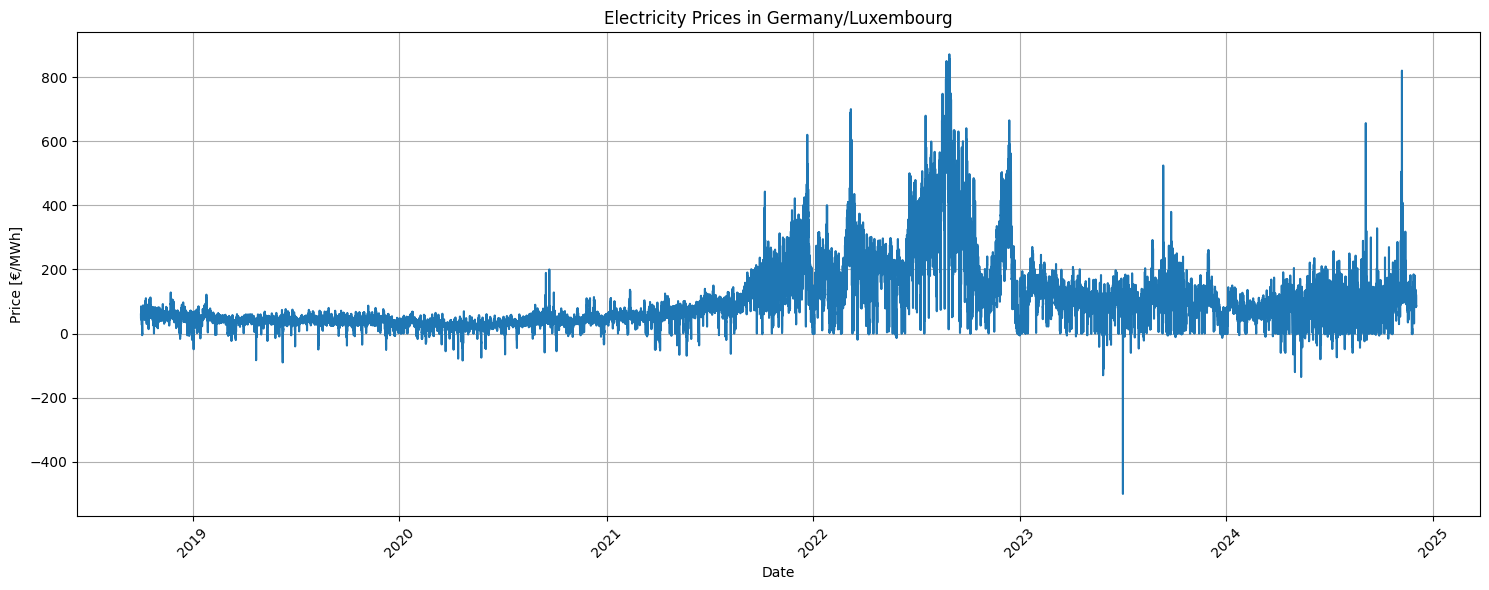

In [8]:
plt.figure(figsize=(15, 6))
plt.plot(df['date'], df['Deutschland/Luxemburg [€/MWh] Originalauflösungen'])
plt.title('Electricity Prices in Germany/Luxembourg')
plt.xlabel('Date')
plt.ylabel('Price [€/MWh]')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

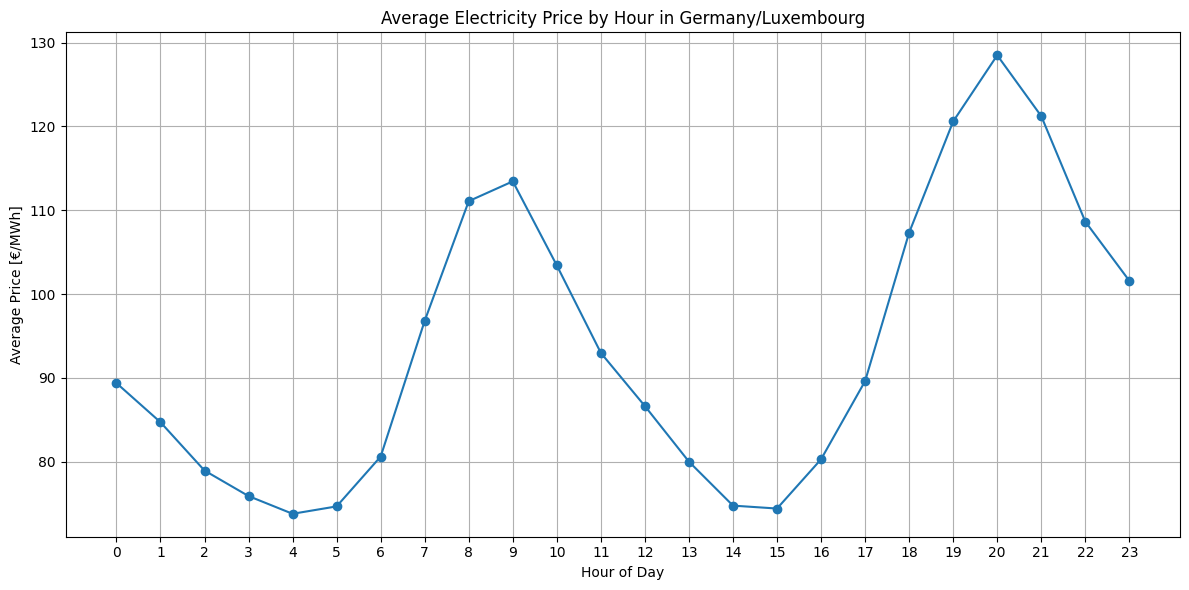

In [9]:
# Calculate average price per hour
hourly_avg = df.groupby(df['date'].dt.hour)['Deutschland/Luxemburg [€/MWh] Originalauflösungen'].mean()

# Create plot
plt.figure(figsize=(12,6))
plt.plot(hourly_avg.index, hourly_avg.values, marker='o')
plt.title('Average Electricity Price by Hour in Germany/Luxembourg')
plt.xlabel('Hour of Day')
plt.ylabel('Average Price [€/MWh]')
plt.grid(True)
plt.xticks(range(0,24))
plt.tight_layout()

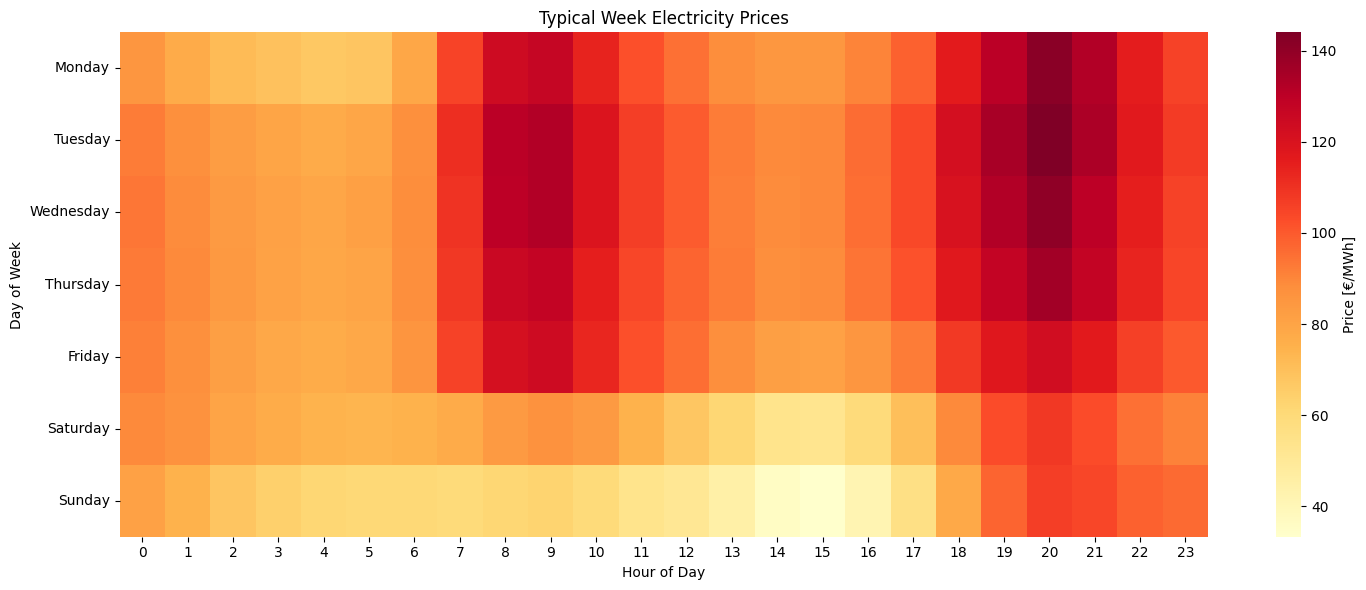

In [10]:
# Create figure for typical week analysis
plt.figure(figsize=(15, 6))

# Calculate average price for each hour and day of week
weekly_profile = df.assign(
    hour=df['date'].dt.hour,
    day=df['date'].dt.day_name()
).groupby(['day', 'hour'])['Deutschland/Luxemburg [€/MWh] Originalauflösungen'].mean().unstack()

# Reorder days
weekly_profile = weekly_profile.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Create heatmap
sns.heatmap(weekly_profile, cmap='YlOrRd', 
            xticklabels=range(24),
            yticklabels=weekly_profile.index,
            cbar_kws={'label': 'Price [€/MWh]'})

plt.title('Typical Week Electricity Prices')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.tight_layout()

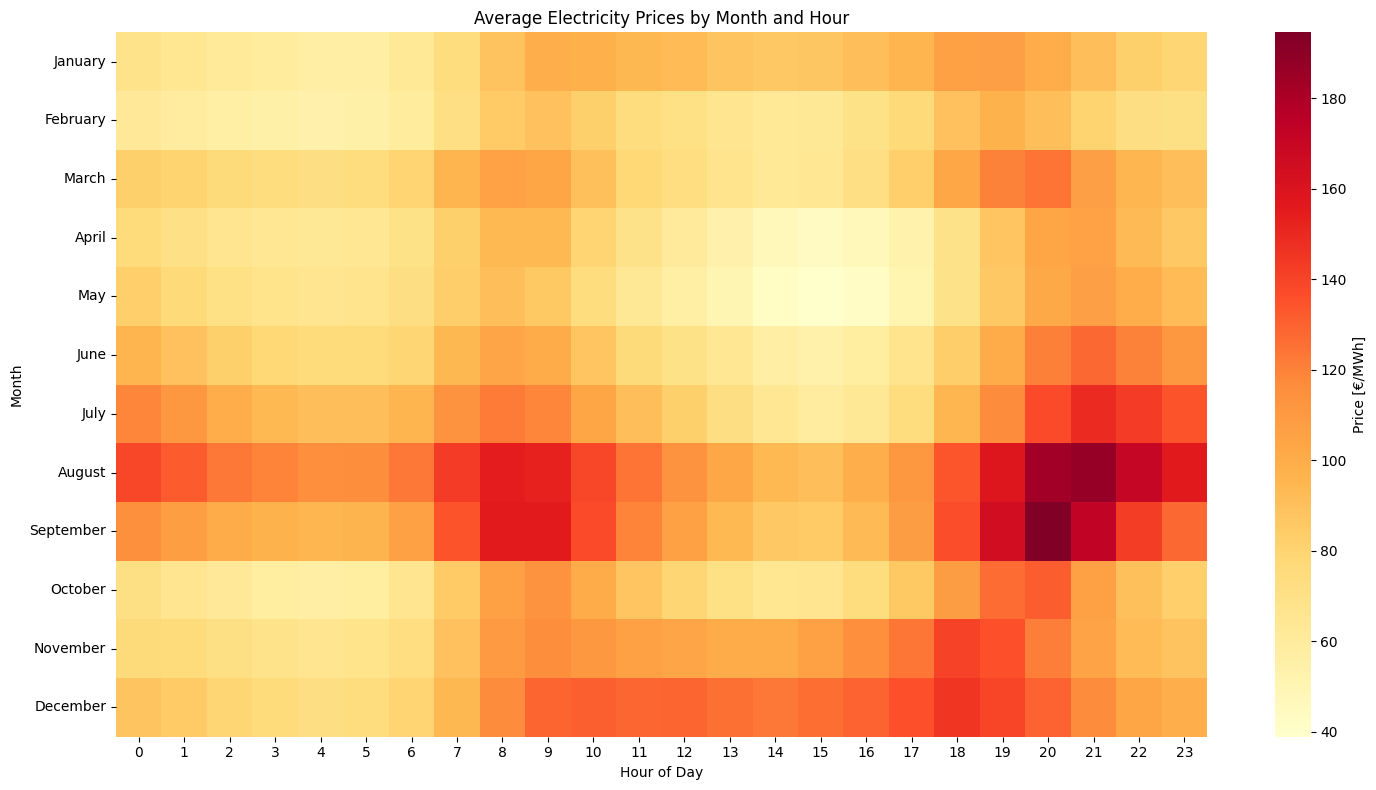

In [12]:
# Calculate average price for each month and hour
monthly_hourly_profile = df.assign(
    month=df['date'].dt.month_name(),
    hour=df['date'].dt.hour
).groupby(['month', 'hour'])['Deutschland/Luxemburg [€/MWh] Originalauflösungen'].mean().unstack()

# Reorder months
monthly_hourly_profile = monthly_hourly_profile.reindex(index=months_order)

# Create heatmap
plt.figure(figsize=(15, 8))
sns.heatmap(monthly_hourly_profile, cmap='YlOrRd',
            xticklabels=range(24),
            yticklabels=months_order,
            cbar_kws={'label': 'Price [€/MWh]'})

plt.title('Average Electricity Prices by Month and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Month')
plt.tight_layout()
